In [2]:
import requests
from bs4 import BeautifulSoup
#%load_ext cudf.pandas
import pandas as pd
links_lsit = {'https://en.wikipedia.org/wiki/List_of_WBA_world_champions':'no_im', 'https://en.wikipedia.org/wiki/List_of_WBC_world_champions':'no_im',
             'https://en.wikipedia.org/wiki/List_of_WBO_world_champions':'no_im', 'https://en.wikipedia.org/wiki/List_of_The_Ring_world_champions':'no_im',
             'https://en.wikipedia.org/wiki/List_of_IBF_world_champions':'no_im', 'https://en.wikipedia.org/wiki/List_of_IBO_world_champions':'im', 
            'https://en.wikipedia.org/wiki/List_of_IBF_female_world_champions':'im', 'https://en.wikipedia.org/wiki/List_of_WBA_female_world_champions':'im',
            'https://en.wikipedia.org/wiki/List_of_WBC_female_world_champions':'im', 'https://en.wikipedia.org/wiki/List_of_WBO_female_world_champions':'im',
             'https://en.wikipedia.org/wiki/List_of_WIBO_world_champions':'im'}




New code

In [2]:
name_list = []

In [1]:
def extract_names(lnks):
    for lnk,flag in lnks.items():
        r = requests.get(lnk)
        soup = BeautifulSoup(r.text, 'html.parser')
        soup = BeautifulSoup(r.text, 'html.parser')
        for table in soup.find_all('table'):
            for row in table.find_all('tr'):
                td_tag = row.find('td', align='left')
                if flag == 'no_im':
                    if td_tag: 
                        try:
                            anchor_tag = td_tag.find('a')  # Find <a> tag within <td> tag
                            name_list.append(anchor_tag.text.strip())
                        except:
                            name_list.append(td_tag.text.strip())
                if flag == 'im':
                    if td_tag:
                                anchor_tag = td_tag.find_all('a')
                                try:
                                    name_list.append(anchor_tag[1].text.strip())
                                except:
                                    name_list.append(td_tag.text.strip())                       
                

        

In [23]:
print('yes' if 'vacant' in name_list else 'no')
name_list.remove('vacant')


yes


In [223]:
len(set(name_list))

2236

In [27]:
df = pd.DataFrame(columns=['Name'])

In [28]:
df['Name'] = name_list

In [29]:
df.shape

(3664, 1)

In [30]:
df['Name'].value_counts()
#df.shape

Name
Canelo Álvarez          15
Naoya Inoue             13
Floyd Mayweather Jr.    13
Claressa Shields        12
Manny Pacquiao          12
                        ..
Yésica Bopp              1
Walter McGowan           1
Susi Kentikian (2)       1
Ha-Na Kim                1
Erick Rosa               1
Name: count, Length: 2236, dtype: int64

In [31]:
df_clean = df.drop_duplicates(ignore_index = True)

In [32]:
df_clean.shape

(2236, 1)

In [33]:
df_clean.value_counts()

Name            
                    1
Nana Konadu (2)     1
Myung Ok Ryu        1
Myung Ok Ryu (2)    1
Mzonke Fana         1
                   ..
Herbie Hide         1
Henry Maske         1
Henry Armstrong     1
Henry Akinwande     1
Óscar Valdez        1
Name: count, Length: 2236, dtype: int64

In [34]:
print([a for a in df_clean['Name'] if ('(') in a]) 

['Eva Voraberger (2)', 'Hannah Rankin (2)', 'Teeraporn Pannimit (2)', 'Melissa McMorrow (2)', 'Ana Julaton (2)', 'Amanda Serrano (2) (elevated to Super champion on 19 Feb 2020)', 'Fernanda Soledad Alegre (2)', 'Christina Linardatou (2)', 'Katie Taylor (2)', 'Hanna Gabriels (2)', 'Claressa Shields (2)', 'Myung Ok Ryu (2)', 'Ana María Torres (2) - Interim champion promoted', 'Anita Christensen (2) - Interim champion promoted', 'Jackie Nava (2)', 'Alicia Ashley (2)', 'Jelena Mrdjenovich (2)', 'Jelena Mrdjenovich (3)', 'Jessica Rakoczy (2)', 'Ann Saccurato (2)', 'Ann Saccurato (3)', 'Susi Kentikian (2)', 'Liliana Palmera (2)', 'Cecilia Comunales (2)', 'Nancy Franco (2)', 'Claudia Andrea López (2)', 'Lennox Lewis (2)', 'Anthony Joshua (2)', 'Carl Thompson (2)', 'Danny Green (2)', 'Ola Afolabi (2)', 'Antonio Tarver (2)', 'Antonio Tarver (3)', 'Dominic Boesel (2)', 'Raymond Joval (2)', 'Gennady Golovkin (2)', 'Zaurbek Baysangurov (2)', 'Israel Cardona (2)', 'Cassius Baloyi (2)', 'Silence Mabu

In [36]:

# Filter the DataFrame to get rows where the 'Name' column contains the symbol \
mask = df_clean['Name'].str.contains('\(')
#print(mask)
df_clean = df_clean[~mask]


0       False
1       False
2       False
3       False
4       False
        ...  
2231    False
2232    False
2233    False
2234     True
2235    False
Name: Name, Length: 2236, dtype: bool


In [38]:
df_clean.tail(20)

,Name
2211,Pichitnoi Sitbangprachan
2212,Beibis Mendoza
2213,Roberto Vásquez
2214,Brahim Asloum
2217,Alberto Rossel
2218,Kenshiro Teraji – Unified champion
2219,Carlos Cañizales
2220,Esteban Bermudez
2221,Kim Bong-jun
2222,Chana Porpaoin


In [39]:
df_clean = df_clean.drop(df_clean[df_clean['Name'] == 'vacant'].index)

In [40]:
import numpy as np

name_lists = name_list_IBO + name_list_IBF + name_list_thering + name_list_wbo + name_list_wbc + name_list

#df_clean['Sex'] = np.where(df_clean['Name'].isin(name_lists), 'M', 'F')
df_clean['Sex'] = np.where(df_clean['Name'].isin(name_lists), 'M', 'F')


In [42]:
df_clean.tail(10)

,Name,Sex
2223,Noel Arambulet,M
2224,Joma Gamboa,M
2225,Keitaro Hoshino,M
2227,Yutaka Niida,M
2229,Kwanthai Sithmorseng,M
2230,Pornsawan Porpramook,M
2231,Ryo Miyazaki,M
2232,Byron Rojas,M
2233,Knockout CP Freshmart,M
2235,Erick Rosa,M


In [43]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from time import sleep

In [40]:
#chrome_user_data_dir = 'C:\\Users\\HP\\AppData\\Local\\Google\\Chrome\\User Data'
#chrome_options = webdriver.ChromeOptions()

# Add the user data directory to Chrome options
#chrome_options.add_argument(f"user-data-dir={chrome_user_data_dir}")

In [44]:
df_clean.reset_index(inplace=True, drop=True)

In [48]:
df_clean['Name'] = df_clean['Name'].str.strip()

In [ ]:
df_clean.drop(df_clean.loc[df_clean['Name'].str.contains(' –')].index, inplace=True)

In [67]:
df_clean.head(20)

,Name,Sex
0,Franchón Crews-Dezurn,F
1,Savannah Marshall,F
2,Claressa Shields,F
3,Jessica McCaskill,F
4,Chantelle Cameron,F
5,Katie Taylor,F
6,Mikaela Mayer,F
7,Alycia Baumgardner,F
8,Amanda Serrano,F
9,Dina Thorslund,F


In [88]:
data = []

In [82]:
driver = webdriver.Chrome(options=options)
driver.get("https://en.wikipedia.org/wiki/Main_Page")
driver.maximize_window()

data = []  # List to store scraped data

for name in df_clean['Name']:
    try:   
        input_box = driver.find_element(By.CLASS_NAME, "cdx-text-input__input")
        input_box.clear()
        input_box.send_keys(name)
        sleep(1)
        input_box = driver.find_element(By.CLASS_NAME, "cdx-text-input__input") 
        input_box.send_keys(Keys.ENTER)
        # Wait until the infobox appears
        WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.CLASS_NAME, "infobox")))
        #sleep(2)
        html_boxer = BeautifulSoup(driver.page_source, 'html.parser')
        big_t = html_boxer.find('table', class_="infobox")
        
        # Extract data if boxer page is found
        birthday = None
        nationality = None
        weight = None
        height = None
        reach = None
        stance = None
        total_fights = None
        wins = None
        wins_by_ko = None
        losses = None
        draws = None
        no_contests = None
        
        rows = big_t.find_all('tr')
        
        for row in rows:
            if row.find('th') is None:
                pass
            elif row.find('th').text.strip() == "Born":
                try:
                    birthday = row.find('span', class_="bday").text.strip()
                    nationality = row.find('div', class_="birthplace").text.strip()
                except:
                    pass
            elif row.find('th').text.strip() == "Weight(s)" or row.find('th').text.strip() == "Division":
                try:
                    weightinfo = row.find('td', class_="infobox-data")
                    weight = '/'.join(wei.get_text().strip() for wei in weightinfo.find_all('a'))
                except:
                    pass
            elif row.find('th').text.strip() == "Height":
                try:
                    height = row.find('td', class_="infobox-data").text.strip()
                except:
                    pass
            elif row.find('th').text.strip() == "Reach":
                try:
                    reach = row.find('td', class_="infobox-data").text.strip()
                except:
                    pass
            elif row.find('th').text.strip() == "Stance":
                try:
                    stan = row.find('td', class_="infobox-data")
                    stance = stan.find('a').text.strip()
                except:
                    pass
            elif row.find('th').text.strip() == "Total fights":
                try:
                    total_fights = row.find('td', class_="infobox-data").text.strip()
                except:
                    pass
                
            elif row.find('th').text.strip() == "Wins":
                try:
                    wins = row.find('td', class_="infobox-data").text.strip()
                except:
                    pass
            elif row.find('th').text.strip() == "Wins by KO":
                try:
                    wins_by_ko = row.find('td', class_="infobox-data").text.strip()
                except:
                    pass
            elif row.find('th').text.strip() == "Losses":
                try:
                    losses = row.find('td', class_="infobox-data").text.strip()
                except:
                    pass
            elif row.find('th').text.strip() == "Draws":
                try:
                    draws = row.find('td', class_="infobox-data").text.strip()
                except:
                    pass
            elif row.find('th').text.strip() == "No contests":
                try:
                    no_contests = row.find('td', class_="infobox-data").text.strip()
                except:
                    pass
                
        data.append({
            'Name': name,
            'Birthday': birthday,
            'Nationality': nationality,
            'Weight': weight,
            'Height': height,
            'Reach': reach,
            'Stance': stance,
            'Total Fights': total_fights,
            'Wins': wins,
            'Wins by KO': wins_by_ko,
            'Losses': losses,
            'Draws': draws,
            'No Contests': no_contests
        })
        sleep(1)
        
    except Exception as e:
         print(e)
         data.append({
                'Name': name,
                'Birthday': None,
                'Nationality': None,
                'Weight': None,
                'Height': None,
                'Reach': None,
                'Stance': None,
                'Total Fights': None,
                'Wins': None,
                'Wins by KO': None,
                'Losses': None,
                'Draws': None,
                'No Contests': None
            })

# Create DataFrame from scraped data

df_final = pd.DataFrame(data)


Message: stale element reference: stale element not found
  (Session info: chrome=122.0.6261.95); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#stale-element-reference-exception
Stacktrace:
	GetHandleVerifier [0x00007FF7381AAD22+56930]
	(No symbol) [0x00007FF73811F622]
	(No symbol) [0x00007FF737FD42E5]
	(No symbol) [0x00007FF737FD9261]
	(No symbol) [0x00007FF737FDB6EB]
	(No symbol) [0x00007FF737FDB7B0]
	(No symbol) [0x00007FF738014AAA]
	(No symbol) [0x00007FF738013662]
	(No symbol) [0x00007FF73803BC9A]
	(No symbol) [0x00007FF73800F09A]
	(No symbol) [0x00007FF73803BEB0]
	(No symbol) [0x00007FF7380581E2]
	(No symbol) [0x00007FF73803BA43]
	(No symbol) [0x00007FF73800D438]
	(No symbol) [0x00007FF73800E4D1]
	GetHandleVerifier [0x00007FF738526AAD+3709933]
	GetHandleVerifier [0x00007FF73857FFED+4075821]
	GetHandleVerifier [0x00007FF73857817F+4043455]
	GetHandleVerifier [0x00007FF738249756+706710]
	(No symbol) [0x00007FF7

In [90]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          1949 non-null   object
 1   Birthday      1449 non-null   object
 2   Nationality   1384 non-null   object
 3   Weight        1454 non-null   object
 4   Height        1310 non-null   object
 5   Reach         927 non-null    object
 6   Stance        1275 non-null   object
 7   Total Fights  1442 non-null   object
 8   Wins          1477 non-null   object
 9   Wins by KO    1440 non-null   object
 10  Losses        1436 non-null   object
 11  Draws         922 non-null    object
 12  No Contests   363 non-null    object
dtypes: object(13)
memory usage: 198.1+ KB


In [85]:
df_final.columns

Index(['Name', 'Birthday', 'Nationality', 'Weight', 'Height', 'Reach',
       'Stance', 'Total Fights', 'Wins', 'Wins by KO', 'Losses', 'Draws',
       'No Contests'],
      dtype='object')

In [91]:
df_recheck = df_final[(df_final[['Birthday', 'Nationality', 'Weight', 'Height', 'Reach', 'Stance', 'Total Fights', 'Wins', 'Wins by KO', 'Losses', 'Draws', 'No Contests']].isnull().all(axis=1)) & (~df_final['Name'].isnull())]

In [92]:
df_recheck

,Name,Birthday,Nationality,Weight,Height,Reach,Stance,Total Fights,Wins,Wins by KO,Losses,Draws,No Contests
3,Jessica McCaskill,None,None,None,None,None,None,None,None,None,None,None,None
12,Zongju Cai,None,None,None,None,None,None,None,None,None,None,None,None
13,Sarah Bormann,None,None,None,None,None,None,None,None,None,None,None,None
16,Eva Voraberger,None,None,None,None,None,None,None,None,None,None,None,None
18,Daniela Asenjo,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,Pedro Flores,None,None,None,None,None,None,None,None,None,None,None,None
1923,Lupe Madera,None,None,None,None,None,None,None,None,None,None,None,None
1924,Francisco Quiróz,None,None,None,None,None,None,None,None,None,None,None,None
1928,Carlos Murillo,None,None,None,None,None,None,None,None,None,None,None,None


In [109]:
driver = webdriver.Chrome(options=options)
driver.get("https://en.wikipedia.org/wiki/Main_Page")
driver.maximize_window()

data = []  # List to store scraped data

for name in df_recheck['Name']:
    try:   
        input_box = driver.find_element(By.CLASS_NAME, "cdx-text-input__input")
        input_box.clear()
        input_box.send_keys(name)
        sleep(1)
        input_box = driver.find_element(By.CLASS_NAME, "cdx-text-input__input") 
        input_box.send_keys(Keys.ENTER)
        # Wait until the infobox appears
        WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.CLASS_NAME, "infobox")))
        #sleep(2)
        html_boxer = BeautifulSoup(driver.page_source, 'html.parser')
        big_t = html_boxer.find('table', class_="infobox")
        
        # Extract data if boxer page is found
        birthday = None
        nationality = None
        weight = None
        height = None
        reach = None
        stance = None
        total_fights = None
        wins = None
        wins_by_ko = None
        losses = None
        draws = None
        no_contests = None
        
        rows = big_t.find_all('tr')
        
        for row in rows:
            if row.find('th') is None:
                pass
            elif row.find('th').text.strip() == "Born":
                try:
                    birthday = row.find('span', class_="bday").text.strip()
                    nationality = row.find('div', class_="birthplace").text.strip()
                except:
                    pass
            elif row.find('th').text.strip() == "Weight(s)" or row.find('th').text.strip() == "Division":
                try:
                    weightinfo = row.find('td', class_="infobox-data")
                    weight = '/'.join(wei.get_text().strip() for wei in weightinfo.find_all('a'))
                except:
                    pass
            elif row.find('th').text.strip() == "Height":
                try:
                    height = row.find('td', class_="infobox-data").text.strip()
                except:
                    pass
            elif row.find('th').text.strip() == "Reach":
                try:
                    reach = row.find('td', class_="infobox-data").text.strip()
                except:
                    pass
            elif row.find('th').text.strip() == "Stance":
                try:
                    stan = row.find('td', class_="infobox-data")
                    stance = stan.find('a').text.strip()
                except:
                    pass
            elif row.find('th').text.strip() == "Total fights":
                try:
                    total_fights = row.find('td', class_="infobox-data").text.strip()
                except:
                    pass
                
            elif row.find('th').text.strip() == "Wins":
                try:
                    wins = row.find('td', class_="infobox-data").text.strip()
                except:
                    pass
            elif row.find('th').text.strip() == "Wins by KO":
                try:
                    wins_by_ko = row.find('td', class_="infobox-data").text.strip()
                except:
                    pass
            elif row.find('th').text.strip() == "Losses":
                try:
                    losses = row.find('td', class_="infobox-data").text.strip()
                except:
                    pass
            elif row.find('th').text.strip() == "Draws":
                try:
                    draws = row.find('td', class_="infobox-data").text.strip()
                except:
                    pass
            elif row.find('th').text.strip() == "No contests":
                try:
                    no_contests = row.find('td', class_="infobox-data").text.strip()
                except:
                    pass
                
        data.append({
            'Name': name,
            'Birthday': birthday,
            'Nationality': nationality,
            'Weight': weight,
            'Height': height,
            'Reach': reach,
            'Stance': stance,
            'Total Fights': total_fights,
            'Wins': wins,
            'Wins by KO': wins_by_ko,
            'Losses': losses,
            'Draws': draws,
            'No Contests': no_contests
        })
        
        
    except Exception as e:
         print(e)
         data.append({
                'Name': name,
                'Birthday': None,
                'Nationality': None,
                'Weight': None,
                'Height': None,
                'Reach': None,
                'Stance': None,
                'Total Fights': None,
                'Wins': None,
                'Wins by KO': None,
                'Losses': None,
                'Draws': None,
                'No Contests': None
            })

# Create DataFrame from scraped data

df_final_2 = pd.DataFrame(data)


Message: 
Stacktrace:
	GetHandleVerifier [0x00007FF7381AAD22+56930]
	(No symbol) [0x00007FF73811F622]
	(No symbol) [0x00007FF737FD42E5]
	(No symbol) [0x00007FF7380198ED]
	(No symbol) [0x00007FF738019A2C]
	(No symbol) [0x00007FF73805A967]
	(No symbol) [0x00007FF73803BCDF]
	(No symbol) [0x00007FF7380581E2]
	(No symbol) [0x00007FF73803BA43]
	(No symbol) [0x00007FF73800D438]
	(No symbol) [0x00007FF73800E4D1]
	GetHandleVerifier [0x00007FF738526AAD+3709933]
	GetHandleVerifier [0x00007FF73857FFED+4075821]
	GetHandleVerifier [0x00007FF73857817F+4043455]
	GetHandleVerifier [0x00007FF738249756+706710]
	(No symbol) [0x00007FF73812B8FF]
	(No symbol) [0x00007FF738126AE4]
	(No symbol) [0x00007FF738126C3C]
	(No symbol) [0x00007FF7381168F4]
	BaseThreadInitThunk [0x00007FFF56907344+20]
	RtlUserThreadStart [0x00007FFF574426B1+33]

Message: 
Stacktrace:
	GetHandleVerifier [0x00007FF7381AAD22+56930]
	(No symbol) [0x00007FF73811F622]
	(No symbol) [0x00007FF737FD42E5]
	(No symbol) [0x00007FF7380198ED]
	(No 

In [108]:
data = []

In [113]:
df_final_2[df_final_2['Name'] == 'Amir Khan']

,Name,Birthday,Nationality,Weight,Height,Reach,Stance,Total Fights,Wins,Wins by KO,Losses,Draws,No Contests
240,Amir Khan,1986-12-08,"Bolton, Greater Manchester, England",Lightweight/Light-welterweight/Welterweight/Mi...,5 ft 81⁄2 in (174 cm)[1],71 in (180 cm)[1],Orthodox,40,34,21,6,None,None


In [156]:
df_final_2.columns

Index(['Name', 'Birthday', 'Nationality', 'Weight', 'Height', 'Reach',
       'Stance', 'Total Fights', 'Wins', 'Wins by KO', 'Losses', 'Draws',
       'No Contests'],
      dtype='object')

In [196]:
df_final_2.to_csv('df_better_final_2.csv')

In [203]:
final_ds = pd.concat([df_final, df_final_2], ignore_index=True)

In [208]:
final_ds.head(10)

,Name,Birthday,Nationality,Weight,Height,Reach,Stance,Total Fights,Wins,Wins by KO,Losses,Draws,No Contests
0,Franchón Crews-Dezurn,1987-06-13,"Virginia Beach, Virginia, U.S.",Super middleweight,5 ft 8 in (173 cm)[1],72 in (183 cm),Orthodox,12,9,2,2,None,1
1,Savannah Marshall,1991-05-19,"Hartlepool, England",Middleweight/Super-middleweight,6 ft 0 in (183 cm)[1],72 in (183 cm)[1],None,14,13,10,1,None,None
2,Claressa Shields,1995-03-17,None,Light middleweight/Middleweight/Super middlewe...,5 ft 8 in (173 cm),68 in (173 cm)[2],None,None,2,None,1,None,None
4,Chantelle Cameron,1991-05-14,"Northampton, England",Super-featherweight/Lightweight/Light-welterwe...,5 ft 8 in (173 cm)[1],None,Orthodox,19,18,8,1,None,None
5,Katie Taylor,1986-07-02,"Bray, County Wicklow, Ireland",Lightweight/Super-lightweight,5 ft 5 in (165 cm)[1],66 in (168 cm)[1],Orthodox,24,23,6,1,None,None
6,Mikaela Mayer,1990-07-04,"Los Angeles, California, U.S.",Super featherweight/Lightweight,5 ft 9 in (175 cm)[1],66+1⁄2 in (169 cm),Orthodox,21,19,5,2,None,None
7,Alycia Baumgardner,1994-05-24,"Fremont, Ohio, U.S.",Super featherweight,5 ft 6 in (168 cm),66 in (168 cm),Orthodox,15,14,7,1,None,None
8,Amanda Serrano,1988-10-09,"Carolina, Puerto Rico",Super flyweight/Bantamweight/Super bantamweigh...,5 ft 5+1⁄2 in (166 cm)[1],65+1⁄2 in (166 cm)[1],Southpaw,49,2,30,0,1,None
9,Dina Thorslund,1993-10-14,"Copenhagen, Denmark",Bantamweight/Super bantamweight,5 ft 4 in (163 cm),None,Orthodox,21,21,9,None,None,None
10,Marlen Esparza,1989-07-29,"Pasadena, Texas, U.S.",Flyweight,5 ft 3 in (160 cm),64 in (163 cm),Orthodox,15,14,1,1,None,None


In [206]:
final_ds.drop_duplicates(subset=['Name'], keep='last', inplace=True)


In [212]:
final_ds['Sex'] = np.where(final_ds['Name'].isin(name_lists), 'M', 'F')

In [214]:
final_ds['Sex'].value_counts()

Sex
M    1688
F     261
Name: count, dtype: int64

In [228]:
final_ds.isna().sum()

Name               0
Birthday         332
Nationality      405
Weight           327
Height           486
Reach            912
Stance           527
Total Fights     342
Wins             304
Wins by KO       345
Losses           352
Draws            928
No Contests     1549
Sex                0
dtype: int64

In [296]:
final_ds.to_csv('final_data.csv')

In [250]:
import re 


In [291]:

# Apply the function to extract height in centimeters for each row
#final_ds['Height_cm'] = final_ds['Height'].str.split('m')[0]
def msplit(x):
    try:
        return x.split('m')[0]
    except:
        return x
def othersplits(x):
    try:
        return x.split('(')[1]
    except:
        return x

final_ds['Height_cm'] = final_ds['Height'].apply(msplit)
final_ds['Height_cm'] = final_ds['Height_cm'].apply(othersplits)






In [299]:
final_ds['Height_cm'] = final_ds['Height_cm'].str.replace('.', '')

In [335]:
def othersplits(x):
    try:
        return x.split(')')[0]
    except:
        return x
final_ds['Reach_cm'] = final_ds['Reach_cm'].apply(othersplits)

In [354]:
final_ds.head()

,Name,Birthday,Place_of_birth,Weight,Height,Reach,Stance,Total Fights,Wins,Wins by KO,Losses,Draws,No Contests,Sex,Height_cm,Reach_cm,Country
0,Franchón Crews-Dezurn,1987-06-13,"Virginia Beach, Virginia, U.S.",Super middleweight,5 ft 8 in (173 cm)[1],72 in (183 cm),Orthodox,12,9,2,2,None,1,F,173,183,U.S.
1,Savannah Marshall,1991-05-19,"Hartlepool, England",Middleweight/Super-middleweight,6 ft 0 in (183 cm)[1],72 in (183 cm)[1],None,14,13,10,1,None,None,F,183,183,England
2,Claressa Shields,1995-03-17,None,Light middleweight/Middleweight/Super middlewe...,5 ft 8 in (173 cm),68 in (173 cm)[2],None,None,2,None,1,None,None,F,173,173,unknown
4,Chantelle Cameron,1991-05-14,"Northampton, England",Super-featherweight/Lightweight/Light-welterwe...,5 ft 8 in (173 cm)[1],None,Orthodox,19,18,8,1,None,None,F,173,None,England
5,Katie Taylor,1986-07-02,"Bray, County Wicklow, Ireland",Lightweight/Super-lightweight,5 ft 5 in (165 cm)[1],66 in (168 cm)[1],Orthodox,24,23,6,1,None,None,F,165,168,Ireland


In [347]:
final_ds['Country'] = final_ds_filled['Nationality'].str.split(',').str[-1]

In [359]:
final_ds.to_csv('final_data.csv')

In [353]:
final_ds.rename(columns={'Nationality': 'Place_of_birth'}, inplace=True)

In [358]:
final_ds.reset_index(drop=True, inplace=True)

In [12]:
final_ds['Country'] = final_ds['Country'].str.strip()

In [19]:
final_ds_filled = final_ds.fillna('unknown')

In [9]:
place_mapping = {
    'Soviet Union (now Russia)' : 'Russia',
    'USCAR(nowadays Japan)' : 'Japan',
    'Japan[1]' : 'Japan',
    'Japan)' : 'Japan',
    'Soviet Union(now Ukraine)': 'Ukraine',
    'Italy[1]' : 'Italy',
    '[1] Japan' : 'Japan',
    'North Korea)' : 'North Korea',
    'Soviet Union[1]' : 'Soviet Union',
    "Polish People's Republic" : 'Poland',
    'Argentina[1]' :  'Argentina',
    'Mexico[2]' : 'Mexico',
    'England [1]' : 'England',
    'Soviet Union(now Kazakhstan)' : 'Kazakhstan',
    'East Germany(now Germany)' : 'Germany',
    'East Germany(nowadays Germany)' : 'Germany',
    'Romania[1]' : 'Romania',
    'USSR(nowadays Azerbaijan)' : 'Azerbaijan',
    'México' : 'Mexico',
    'Mie Prefecture Japan' : 'Japan',
    'East Germany(now Germany)' : 'Germany',
    'SFR Yugoslavia[2]' : 'Yugoslavia',
    'Italy[1][2]' : 'Italy',
    'Soviet Union(now Belarus)' : 'Belarus',
    '[3][4] Japan' : 'Japan',
    'Kazakh SSR(now Kazakhstan)' : 'Kazakhstan',
    'Colombia[1]' : 'Colombia',
    'Ontario' : 'Canada',
    'Soviet Union (now Belarus)' : 'Belarus',
    'Japan[1](now in Kanuma)' : 'Japan',
    'South Korea[1]' : 'South Korea',
    'Vietnam[1]' : 'Vietnam',
    'Canada[1]' : 'Canada',
    'Japan[3]' : 'Japan',
    'Kingdom of Tunisia' : 'Tunisia',
    'French Senegal' : 'Senegal',
    'Puerto Rico[1]' : 'Puerto Rico',
    'Soviet Union (now Uzbekistan)' : 'Uzbekistan',
    'Japan[1][2]' : 'Japan',
    'Philippines[2]' : 'Philippines',
    'England[1]' : 'England',
    'Akita'  : 'Japan',
    'Mexico[1]'  : 'Mexico',
    'Nakhon Ratchasima Province' : 'Thailand',
    'Skriveri Latvia' : 'Latvia',
    'First Republic of Korea(nowadays South Korea)' : 'South Korea',
    'Philippines[5][6]' : 'Philippines',
    'Northern Ireland[2]' : 'Ireland',
    "Aqkól village" :  "Kazakhstan",
    'Kazakhstan)' : 'Kazakhstan',
    'Soviet Union(now Kyrgyzstan)' : 'Kyrgyzstan',
    'Armenian SSR' : 'Armenia',
    'U.S.[1][2][3]' : 'USA',
    'Faroe Islands[2]': 'Faroe Islands',
    'England[3]' : 'England',
    'Mexico[3]' : 'Mexico',
    'Western Australia': 'Australia',
    'Soviet Union (now Armenia)': 'Armenia',
    'SFR Yugoslavia (present day Serbia)': 'Serbia',
    'South Africa[3]' : 'South Africa',
    'Australia[1]' : 'Australia',
    'Soviet Union (now Kazakhstan)[2]' : 'Kazakhstan',
    'New South Wales' : 'Australia',
    'Empire of Japan' : 'Japan',
    'Russian Empire (modern-day Ukraine)' : 'Ukraine',
    'U.S.)': 'USA',
    'U.K.)[3]' : 'UK',
    'Quebec': 'Canada',
    'Hokkaidō[1]' : 'Japan',
    'Slovenia)' : 'Slovenia',
    '[1] England': 'England',
    'Philippines[1]': 'Philippines',
    'Soviet Union (now Kazakhstan)' : 'Kazakhstan',
    'SFR Yugoslavia(now Slovenia)': 'Slovenia',
    'Ukraine)' : 'Ukraine',
    'Socialist Republic of Romania' : 'Romania',
    'Santa Cruz' : 'USA',
    'Northern Ireland': 'Ireland',
    'West Germany': 'Germany',  # Assuming 'West Germany' refers to Germany
    'Pennsylvania': 'USA',
    'East Germany': 'Germany',  # Assuming 'East Germany' refers to Germany
    'USCAR': 'Japan',  # Assuming 'USCAR' refers to Japan
    'USSR': 'Soviet Union',  # Assuming 'USSR' refers to Soviet Union
    'Mexico City': 'Mexico',
    'Buenos Aires': 'Argentina',
    'London': 'England',
    'South Jeolla South Korea': 'South Korea',
    'British Columbia': 'Canada',
    'Kanuma': 'Japan',
    'Commonwealth of the Philippines': 'Philippines',
    'FPR Yugoslavia': 'Yugoslavia',
    'Mongolian People\'s Republic': 'Mongolia',
    'Northern Thailand': 'Thailand',
    'Kazakh SSR': 'Kazakhstan',
    'German Empire': 'Germany',  # Assuming 'German Empire' refers to Germany
    'France]': 'France',
    'London England': 'England',
    'Kingdom of Italy': 'Italy',
   
    'Russian Empire': 'Russia',
   
    'Protectorate of Uganda': 'Uganda',
    
    'Hokkaidō': 'Japan',
    'Belgian Congo': 'Congo',
    
    'Colony of Nigeria': 'Nigeria',
    'State of Mexico': 'Mexico',
    
    'eastern Thailand': 'Thailand',
    
    'SFR Yugoslavia': 'Yugoslavia',
    'Philippine Commonwealth': 'Philippines',
    # Add more mappings as needed
}
final_ds['Country'] = final_ds['Country'].replace(place_mapping, regex=False)

In [8]:
# Define the mapping of country names to 'USA'
country_mapping = {
    "Wisconsin": "USA",
    'Alabama': 'USA',
    'U.S.': 'USA',
    'United States': 'USA',
    'US': 'USA',
    'U.S.[2]': 'USA',
    'California': 'USA',
    'Ohio': 'USA',
    'New Jersey': 'USA',
    'American': 'USA',
    'U.S': 'USA',
    'U.S.[1]': 'USA',
    'Texas': 'USA',
    'U.S. Virgin Islands': 'USA',
    'U.S.[3]': 'USA',
    'Territory of Hawaii': 'USA',
    'Minnesota': 'USA',
    'Tennessee': 'USA',
    'Oklahoma': 'USA',
    'United States[2]': 'USA',
    'Rhode Island': 'USA',
    'Louisiana': 'USA',
    'New York City': 'USA',
    'Connecticut': 'USA',
    'Washington': 'USA',
    'New York': 'USA'
}

# Replace values in the 'Country' column using the mapping
final_ds['Country'] = final_ds['Country'].replace(country_mapping, regex=False)


In [141]:
ll = final_ds['Country'].value_counts()

In [3]:
nationalities_mapping = {
  "USA": "American",
  "England": "British",
  "Ireland": "Irish",
  "Puerto Rico": "American(Puerto Rican)", 
  "Denmark": "Danish",
  "Serbia": "Serbian",
  "Mexico": "Mexican",
  "Zambia": "Zambian",
  "Colombia": "Colombian",
  "Scotland": "British(scottish)",
  "Sweden": "Swedish",
  "Greece": "Greek",
  "Japan": "Japanese",
  "South Korea": "South Korean",
  "Nicaragua": "Nicaraguan",
  "Australia": "Australian",
  "Armenia": "Armenian",
  "Argentina": "Argentine",
  "Canada": "Canadian",
  "Poland": "Polish",
  "Brazil": "Brazilian",
  "Dominican Republic": "Dominican",
  "Costa Rica": "Costa Rican",
  "Belgium": "Belgian",
  "Thailand": "Thai",
  "Czech Republic": "Czech",
  "Germany": "German",
  "Hungary": "Hungarian",
  "Jamaica": "Jamaican",
  "Kenya": "Kenyan",
  "France": "French",
  "China": "Chinese",
  "Peru": "Peruvian",
  "Panama": "Panamanian",
  "Uruguay": "Uruguayan",
  "Spain": "Spanish",
  "Faroe Islands": "Faroese",
  "Samoa": "Samoan",
  "Ukraine": "Ukrainian",
  "Russia": "Russian",
  "South Africa": "South African",
  "Haiti": "Haitian",
  "Kosovo": "Kosovar",
  "Kyrgyzstan": "Kyrgyz",
  "Guyana": "Guyanese",
  "Cameroon": "Cameroonian",
  "Malawi": "Malawian",
  "Ecuador": "Ecuadorian",
  "Cuba": "Cuban",
  "Bahamas": "Bahamian",
  "Netherlands": "Dutch",
  "Georgia": "Georgian",
  "Kazakhstan": "Kazakh",
  "Namibia": "Namibian",
  "Italy": "Italian",
  "Indonesia": "Indonesian",
  "Ghana": "Ghanaian",
  "Tajikistan": "Tajik",
  "Uganda": "Ugandan",
  "Mongolia": "Mongolian",
  "Philippines": "Filipino",
  "Latvia": "Latvian",
  "Bosnia": "Bosnian",
  "Romania": "Romanian",
  "Venezuela": "Venezuelan",
  "Belize": "Belizean",
  "Slovenia": "Slovenian",
  "Wales": "British",
  "Uzbekistan": "Uzbek",
  "Pakistan": "Pakistani",
  "Nigeria": "Nigerian",
  "Congo": "Congolese",
  "Algeria": "Algerian",
  "Tunisia": "Tunisian",  # You are here!
  "Belarus": "Belarusian",
  "New Zealand": "New Zealander",
  "Norway": "Norwegian",
  "Suriname": "Surinamese",
  "Croatia": "Croatian",
  "Turkey": "Turkish",
  "Senegal": "Senegalese",
  "Montenegro": "Montenegrin",
  "Ivory Coast": "Ivorian",
  "Trinidad and Tobago": "Trinidadian",
  "Guadeloupe": "Guadeloupean",
  "Israel": "Israeli",
  "Lithuania": "Lithuanian",
  "Saint Kitts and Nevis": "Kittitian",
  "Iran": "Iranian",
  "Azerbaijan": "Azerbaijani",
  "Vietnam": "Vietnamese",
  "Finland": "Finnish",
  "unknown": "Unknown"  # Assign 'unknown' nationality for missing values
}


In [146]:
final_ds['Nationality'] = final_ds['Country'].replace(nationalities_mapping, regex=False)


In [163]:
filled = final_ds.fillna('unknown')
filled.to_csv('kaggleupload.csv')

In [302]:
final_ds = pd.read_csv('kaggleupload.csv')

In [149]:
# Convert to datetime with format using astype
#final_ds['Birthday'] = final_ds['Birthday'].astype(pd.to_datetime, format='%Y-%m-%d')
final_ds['Birthday'] = pd.to_datetime(final_ds['Birthday'], format='%Y-%m-%d')


In [153]:
to_int32 = ['Total Fights','Wins', 'Wins by KO', 'Losses', 'Draws','No Contests'] 
to_category = ['Sex', 'Country', 'Nationality']
def types(df, col, type):
    return df[col].astype(type)

In [162]:
for col in to_category:
    final_ds[col] = final_ds[col].astype('category')

In [303]:
for col in to_int32:
    print(col)
    final_ds[col] = final_ds[col].astype('int32')
    

"for col in to_int32:\n    print(col)\n    final_ds[col] = final_ds[col].astype('int32')\n    \n"

In [304]:
final_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      1949 non-null   int64 
 1   Name            1949 non-null   object
 2   Birthday        1949 non-null   object
 3   Place_of_birth  1949 non-null   object
 4   Weight          1949 non-null   object
 5   Height          1949 non-null   object
 6   Reach           1949 non-null   object
 7   Stance          1949 non-null   object
 8   Total Fights    1949 non-null   object
 9   Wins            1949 non-null   object
 10  Wins by KO      1949 non-null   object
 11  Losses          1949 non-null   object
 12  Draws           1949 non-null   object
 13  No Contests     1949 non-null   object
 14  Sex             1949 non-null   object
 15  Height_cm       1949 non-null   object
 16  Reach_cm        1949 non-null   object
 17  Country         1949 non-null   object
 18  National

In [257]:
def inches_to_cm(inch):
    if 'in' in inch and inch != 'unknown':
        return round(float(inch.split()[0]) * 2.54 , 1)
    else:
        return inch

In [323]:
final_ds['Reach_cm'] = final_ds['Reach_cm'].apply(inches_to_cm)

In [366]:
def func(num):
   if len(num) == 4:
    print(num)
    return num.replace('.', '')
   else:
    return num

In [368]:
final_ds['Reach_cm'] = final_ds['Reach_cm'].str.strip()

In [369]:
final_ds['Reach_cm'] = final_ds['Reach_cm'].apply(func)

1.80
1.68
1.87
1.85
1.69
1.63
1.88


In [72]:
final_ds.to_csv('kaggleupload.csv')

In [3]:
final_ds = pd.read_csv('kaggleupload.csv', parse_dates=['Birthday'])

In [16]:
final_ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1948 entries, 0 to 1948
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Name            1948 non-null   object        
 1   Birthday        1619 non-null   datetime64[ns]
 2   Place_of_birth  1545 non-null   object        
 3   Weight          1609 non-null   object        
 4   Height          1463 non-null   object        
 5   Reach           1037 non-null   object        
 6   Stance          1423 non-null   object        
 7   Total Fights    1607 non-null   object        
 8   Wins            1645 non-null   object        
 9   Wins by KO      1604 non-null   object        
 10  Losses          1597 non-null   object        
 11  Draws           1021 non-null   object        
 12  No Contests     400 non-null    object        
 13  Sex             1948 non-null   object        
 14  Height_cm       1467 non-null   object        
 15  Reach_cm 

In [13]:
final_ds.dropna(subset=['Name'], inplace=True)

In [44]:
def get_horoscope(birthday):
    if birthday is pd.NaT:
      return np.nan
    month = birthday.month
    day = birthday.day
    if month == 12 and day > 21 or month == 1 and day <= 19:
      return "Capricorn"
    elif month == 1 and day >= 20 or month == 2 and day <= 18:
      return "Aquarius" 
    elif month == 2 and day >= 19 or month == 3 and day <= 20:
      return "Pisces"
    elif month == 3 and day >= 21 or month == 4 and day <= 19:  
      return "Aries"
    elif month == 4 and day >= 20 or month == 5 and day <= 20:
      return "Taurus"
    elif month == 5 and day >= 21 or month == 6 and day <= 20:
      return "Gemini"
    elif month == 6 and day >= 21 or month == 7 and day <= 22:
      return "Cancer"
    elif month == 7 and day >= 23 or month == 8 and day <= 22:
      return "Leo"
    elif month == 8 and day >= 23 or month == 9 and day <= 22:
      return "Virgo"
    elif month == 9 and day >= 23 or month == 10 and day <= 22:
      return "Libra"
    elif month == 10 and day >= 23 or month == 11 and day <= 21:
      return "Scorpio"
    elif month == 11 and day >= 22 or month == 12 and day <= 21:
      return "Sagittarius" 
  

In [46]:
df['Sign'] = df['Birthday'].apply(get_horoscope) 

In [73]:
l = final_ds['Weight'].value_counts()

In [74]:
for key, value in l.items():
    print(key, value)

Heavyweight 68
Featherweight 56
Flyweight 50
Lightweight 50
Bantamweight 44
Welterweight 42
Middleweight 39
Cruiserweight 26
Light welterweight 26
Super flyweight 25
Super bantamweight 24
Bantamweight/Super bantamweight 24
Cruiserweight/Heavyweight 23
Light flyweight 23
Light middleweight 22
Light welterweight/Welterweight 21
Lightweight/Light welterweight 20
Light middleweight/Middleweight 20
Light heavyweight 19
Super featherweight 19
Light flyweight/Flyweight 18
Light welterweight/Welterweight/Light middleweight 16
Super-middleweight/Light-heavyweight 16
Super featherweight/Lightweight 15
Featherweight/Super featherweight 15
Super bantamweight/Featherweight 13
Middleweight/Super-middleweight 13
Featherweight/Super featherweight/Lightweight 13
Mini-flyweight 13
Light heavyweight/Cruiserweight 13
Lightweight/Light welterweight/Welterweight 13
Flyweight/Super flyweight 12
Super-middleweight 12
Light flyweight/Flyweight/Super flyweight 12
Middleweight/Super middleweight 12
Welterweight/

#### Weight Classes in pro-boxing and their respective height average (men)
- minimumweight, 105 pounds (48 kg)
- light flyweight, 108 pounds (49 kg)
- flyweight, 112 pounds (51 kg)
- super flyweight, 115 pounds (52 kg)
- bantamweight, 118 pounds (53.5 kg)
- super bantamweight, 122 pounds (55 kg)
- featherweight, 126 pounds (57 kg)
- super featherweight, 130 pounds (59 kg)
- lightweight, 135 pounds (61 kg)
- super lightweight, 140 pounds (63.5 kg)
- welterweight, 147 pounds (67 kg)
- super welterweight, 154 pounds (70 kg)
- middleweight, 160 pounds (72.5 kg)
- super middleweight, 168 pounds (76 kg)
- light heavyweight, 175 pounds (79 kg)
- cruiserweight, 200 pounds (91 kg)
- heavyweight, unlimited


#### Weight Classes in amateur-boxing and their respective height average (men)
- flyweight, 115 pounds (52 kg)
- featherweight, 126 pounds (57 kg)
- lightweight, 139 pounds (63 kg)
- welterweight, 152 pounds (69 kg)
- middleweight, 165 pounds (75 kg)
- light heavyweight, 179 pounds (81 kg)
- heavyweight, 201 pounds (91 kg)
- super heavyweight, any weight over 201 pounds (91 kg)


I chose to get the lowest weight class so that the boxers are the biggest possible compared to the division.

In [53]:
weight_classes = ["minimumweight", "light flyweight", "flyweight", "super flyweight", 
                  "bantamweight", "super bantamweight", "featherweight", "super featherweight",
                  "lightweight", "super lightweight", "welterweight", "super welterweight",
                  "middleweight", "super middleweight", "light heavyweight", "cruiserweight", "heavyweight"]

def get_lowest_weight_class(weight_class_list):
  try:
    #weight_class_list = weight_class_list.lower().replace('-',' ')
    weights = []
    for wc in weight_class_list.split("/"):
      wc = wc.strip()
      if wc in weight_classes:
        weights.append(weight_classes.index(wc))

    if len(weights) > 0:  
      return weight_classes[min(weights)]
    else:
      print(weight_class_list, 'none else')
      return None
      
  except:
    print(weight_class_list, 'none exception')
    return None
    
  
final_ds['Weight_class'] = final_ds['Weight'].apply(get_lowest_weight_class)


<NA> none exception
<NA> none exception
<NA> none exception
<NA> none exception
<NA> none exception
<NA> none exception
<NA> none exception
<NA> none exception
<NA> none exception
<NA> none exception
<NA> none exception
<NA> none exception
<NA> none exception
<NA> none exception
<NA> none exception
<NA> none exception
<NA> none exception
<NA> none exception
<NA> none exception
<NA> none exception
<NA> none exception
<NA> none exception
<NA> none exception
<NA> none exception
<NA> none exception
<NA> none exception
<NA> none exception
<NA> none exception
<NA> none exception
<NA> none exception
<NA> none exception
<NA> none exception
<NA> none exception
<NA> none exception
<NA> none exception
<NA> none exception
<NA> none exception
<NA> none exception
<NA> none exception
<NA> none exception
<NA> none exception
<NA> none exception
<NA> none exception
<NA> none exception
<NA> none exception
<NA> none exception
<NA> none exception
<NA> none exception
<NA> none exception
<NA> none exception


In [52]:
final_ds['Weight'] = final_ds['Weight'].str.strip()
final_ds['Weight'] = final_ds['Weight'].str.replace('lightheavyweight', 'heavyweight')

In [61]:
final_ds_filled = final_ds.fillna('unknown')

In [54]:
final_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1948 entries, 0 to 1947
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1948 non-null   int64  
 1   Name            1948 non-null   object 
 2   Birthday        1619 non-null   object 
 3   Place_of_birth  1545 non-null   object 
 4   Weight          1609 non-null   string 
 5   Height          1463 non-null   object 
 6   Reach           1037 non-null   object 
 7   Stance          1423 non-null   object 
 8   Total Fights    1608 non-null   object 
 9   Wins            1645 non-null   object 
 10  Wins by KO      1604 non-null   object 
 11  Losses          1597 non-null   object 
 12  Draws           1021 non-null   object 
 13  No Contests     400 non-null    object 
 14  Sex             1948 non-null   object 
 15  Height_cm       1467 non-null   object 
 16  Reach_cm        1041 non-null   float64
 17  Country         1546 non-null   o

if total fights are unknown fill the others with unknown otherwise fill them with 0

In [89]:
values = {"No Contests": 0, "Draws": 0, "C": 2, "D": 3}
final_ds.loc[final_ds['Losses'] == '6\n', "Losses"] = '6'

In [78]:
import re
pattern_brac = r'\[\d+\]'
pattern_paren = r'\([^)]*\)'
def remove_par(text, pattern):
    try:
        return re.sub(pattern, '', text)
    except:
        return text

In [73]:
final_ds['Wins'] = final_ds['Wins'].apply(remove_par)

In [81]:
final_ds['Wins'] = final_ds['Wins'].apply(lambda x: remove_par(x, pattern_brac))

In [85]:
cols_to_trat = ['Wins', 'Losses', 'Draws', 'Total Fights', 'No Contests', 'Wins by KO']
for col in cols_to_trat:
    final_ds[col] = final_ds[col].apply(lambda x: remove_par(x, pattern_brac))
    final_ds[col] = final_ds[col].apply(lambda x: remove_par(x, pattern_paren))

    

In [96]:
patt = r';.*'


In [97]:
final_ds['Total Fights'] = final_ds['Total Fights'].apply(lambda x: remove_par(x, patt))

In [155]:
import numpy as np
#final_ds.loc[final_ds['Total Fights'] == np.nan & final_ds['Wins'] != np.nan, ['Total Fights','Wins']]
idx1 = final_ds['Total Fights'].isnull() 
idx2 = ~final_ds['Wins'].isnull()

final_ds.loc[idx1 & idx2,['Name','Total Fights','Wins', 'Wins by KO', 'Losses', 'Draws', 'No Contests']]



,Name,Total Fights,Wins,Wins by KO,Losses,Draws,No Contests


In [167]:
final_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1948 entries, 0 to 1947
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1948 non-null   int64  
 1   Name            1948 non-null   object 
 2   Birthday        1619 non-null   object 
 3   Place_of_birth  1545 non-null   object 
 4   Weight          1609 non-null   string 
 5   Height          1463 non-null   object 
 6   Reach           1037 non-null   object 
 7   Stance          1423 non-null   object 
 8   Total Fights    1645 non-null   object 
 9   Wins            1645 non-null   object 
 10  Wins by KO      1645 non-null   object 
 11  Losses          1598 non-null   object 
 12  Draws           1028 non-null   object 
 13  No Contests     432 non-null    object 
 14  Sex             1948 non-null   object 
 15  Height_cm       1467 non-null   float64
 16  Reach_cm        1041 non-null   float64
 17  Country         1547 non-null   o

In [166]:
final_ds['Country'] = final_ds[['Country', 'Nationality', 'Sign', 'Weight_class', 'Sex']].astype('category')

In [26]:
df.to_csv('working_data.csv')

In [2]:
import pandas as pd
df=pd.read_csv('working_data.csv', parse_dates=['Birthday'])

In [3]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [9]:
import numpy as np
#final_ds.loc[final_ds['Total Fights'] == np.nan & final_ds['Wins'] != np.nan, ['Total Fights','Wins']]
idx1 = df['Place_of_birth'].isnull() 
idx2 = ~df['Country'].isnull()

df.loc[idx1 & idx2,['Name', 'Place_of_birth', 'Country']]

,Name,Place_of_birth,Country
2,Claressa Shields,NaN,USA
640,Paul Pender,NaN,USA
1502,Kwanthai Sithmorseng,NaN,Thailand


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\HP\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


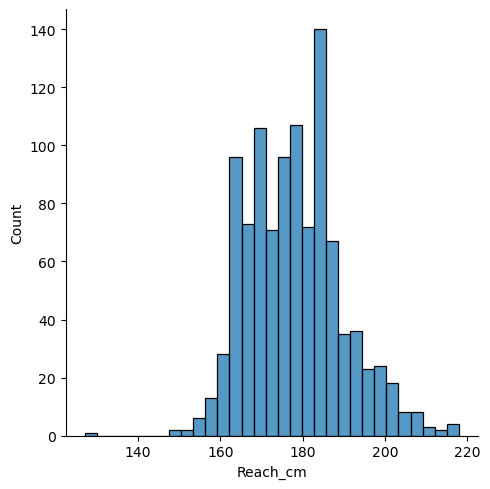

In [63]:
sns.displot(df['Reach_cm'])

In [6]:

df['Sign'].value_counts()

Sign
Leo            150
Virgo          150
Capricorn      148
Aries          147
Aquarius       141
Cancer         138
Taurus         129
Pisces         128
Scorpio        127
Sagittarius    126
Gemini         125
Libra          110
Name: count, dtype: int64

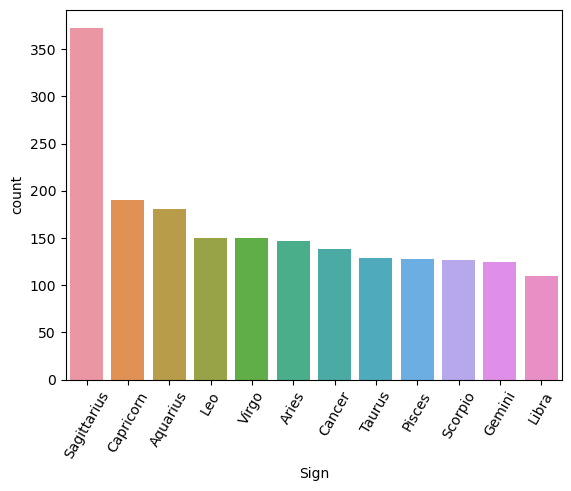

In [42]:
my_plot = sns.countplot(data=df, x='Sign', order=df['Sign'].value_counts().index)
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=60)
plt.show()


In [5]:
ll = df['Country'].value_counts()

In [6]:
for elt,key in ll.items():
    print(elt,key)

USA 385
Mexico 168
Japan 101
England 92
Argentina 56
Puerto Rico 46
Thailand 45
South Africa 44
South Korea 44
Philippines 42
Venezuela 32
Italy 29
Colombia 28
Russia 28
Panama 26
Australia 24
France 23
Dominican Republic 21
Germany 21
Ireland 20
Cuba 19
Canada 14
Nicaragua 13
Spain 13
Ukraine 13
Kazakhstan 11
Ghana 10
Jamaica 10
Wales 10
Scotland 10
Guyana 8
Sweden 8
Brazil 6
Poland 6
Indonesia 6
Denmark 5
Armenia 5
Uganda 5
Nigeria 4
Georgia 4
Haiti 4
Romania 4
China 4
Tunisia 4
Namibia 4
Uzbekistan 3
Congo 3
Cameroon 3
Belgium 3
Peru 3
Hungary 3
Ecuador 2
Mongolia 2
Serbia 2
New Zealand 2
Croatia 2
Turkey 2
Senegal 2
Slovenia 2
Belarus 2
Uruguay 2
Kyrgyzstan 2
Bahamas 2
Israel 1
Lithuania 1
Norway 1
Trinidad and Tobago 1
Ivory Coast 1
kazakhstan 1
Saint Kitts and Nevis 1
Montenegro 1
Iran 1
Azerbaijan 1
Vietnam 1
Suriname 1
Guadeloupe 1
Pakistan 1
Algeria 1
Zambia 1
Malawi 1
Greece 1
Costa Rica 1
Belize 1
Czech Republic 1
Bosnia 1
Latvia 1
Kenya 1
Tajikistan 1
Faroe Islands 1
Samoa 

In [7]:
df.isna().sum()

Unnamed: 0.1         0
Name                 0
Birthday           329
Place_of_birth     403
Weight             339
Height             485
Reach              911
Stance             525
Total Fights       303
Wins               303
Wins by KO         303
Losses             350
Draws              920
No Contests       1516
Sex                  0
Height_cm          481
Reach_cm           907
Country            401
Nationality        401
Sign                 0
Weight_class       339
dtype: int64

In [12]:
df[df['Sex'] == 'F']['Weight_class'].unique()

array(['middleweight', 'lightweight', 'featherweight', 'flyweight',
       'bantamweight', nan, 'welterweight', 'heavyweight',
       'minimumweight'], dtype=object)